# Information Retrieval Assignment 1

    Group 3: Sugam Budhraja (2016A7PS0064G), Mukul Jain (2016A7PS0046G), Shriya TP (2016A7PS0060G)

### Importing Libraries

In [1]:
import nltk
import os,sys
import random
import math
import matplotlib.pyplot as plt

In [2]:
bits_ids = [64, 46, 60]

## Task 1

In [3]:
corpora = os.listdir('../corpora')
len(corpora)

6377

### Choosing a Document Sample

In [4]:
def document_sampler(corpora, no_of_groups, no_of_samples):
    # Randomly selects given number
    corpora_size = len(corpora)
    groups = []
    group_size = math.ceil(corpora_size / no_of_groups)
    for i in range(0, corpora_size, group_size):
        groups.append(corpora[i:i + group_size])
    n = len(groups)
    sampled_corpora = []
    remaining = 1.5 * no_of_samples
    for group in groups:
        group_sample_size = math.ceil(remaining / n)
        sampled_corpora.extend(random.sample(group, group_sample_size))
        remaining -= group_sample_size
        n -= 1
    sampled_corpora = random.sample(sampled_corpora, no_of_samples)
    return sorted(sampled_corpora)

In [5]:
sampled_corpora = document_sampler(corpora, max(bits_ids), 500)
print(len(sampled_corpora),sampled_corpora)

500 ['GX000-14-16748010', 'GX000-34-9679963', 'GX000-49-12224349', 'GX000-56-16493385', 'GX000-63-3636455', 'GX000-64-5866723', 'GX001-08-5834860', 'GX001-12-8380564', 'GX001-16-14126351', 'GX001-23-13679550', 'GX001-49-1759246', 'GX001-60-13661262', 'GX002-09-12860652', 'GX002-21-2749837', 'GX002-29-13068057', 'GX002-44-10720049', 'GX002-49-2717782', 'GX002-89-3295043', 'GX003-15-11693082', 'GX003-24-2094074', 'GX003-53-14433328', 'GX003-79-2665298', 'GX003-90-5300889', 'GX004-44-10049693', 'GX004-44-4958806', 'GX004-45-13410718', 'GX004-56-13614868', 'GX004-76-11859934', 'GX004-82-7551182', 'GX004-94-0630300', 'GX005-19-2223054', 'GX005-29-0821498', 'GX006-46-12583641', 'GX006-50-2080860', 'GX007-07-3099518', 'GX007-39-2116215', 'GX007-60-13341075', 'GX007-68-4405717', 'GX007-79-13292316', 'GX007-85-15421382', 'GX007-86-11212285', 'GX007-99-10718889', 'GX008-24-6611077', 'GX008-26-8860226', 'GX008-71-9359930', 'GX008-73-6765397', 'GX008-83-7595521', 'GX008-87-0169546', 'GX009-16-1483

### Tokenizing Text

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("(?:[A-Z]\.)+|\w+(?:[-']\w+)*|[-.(]+|\S\w*")
tokens = {}
for document in sampled_corpora:
    with open('../corpora/' + document, encoding="utf8") as doc:
        text = doc.read()
        tokens[document] = tokenizer.tokenize(text.lower())

### Creating a full-text inverted index

In [7]:
def create_index(dictionary):
    index = {}
    for document in dictionary:
        for word in dictionary[document]:
            if word in index:
                if document not in index[word]['documents']:
                    index[word]['documents'].append(document)
                index[word]['frequency']+=1
            else:
                index[word]={'frequency':1,'documents':[document]}
    return index

In [8]:
index_full = create_index(tokens)

### Calculating vocabulary and dictionary sizes

In [9]:
def vocab_size(index):
    print("Number of terms in vocabulary =", len(index))  # the set of terms

In [10]:
def dict_size(index):
    print("Dictionary size =", 3*len(index))  # set of terms + document frequency for each term + pointer to posting list (according to slides)

In [11]:
vocab_size(index_full)
dict_size(index_full)

Number of terms in vocabulary = 85530
Dictionary size = 256590


### Finding Stopwords

In [12]:
count = []
for term in index_full:
    if index_full[term]['frequency']>2000: 
        count.append((index_full[term]['frequency'],term))
count.sort(reverse=True)
frequencies, terms = zip(*count)

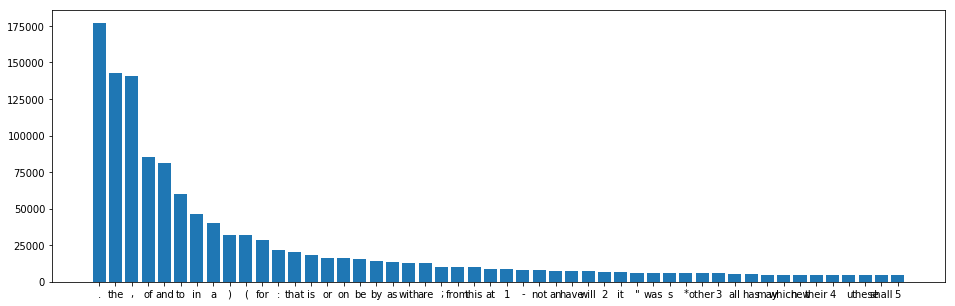

In [13]:
plt.figure(figsize=(16, 5))
plt.bar(x=terms[:50],height=frequencies[:50])
plt.show()

We considered only the first 40 most frequent terms as stopwords because by visual observation words after that limit were not stopwords.

In [14]:
stopwords = list(terms[:40])

In [15]:
print("Stopwords are: \n"+'\t'.join(stopwords))

Stopwords are: 
.	the	,	of	and	to	in	a	)	(	for	:	that	is	or	on	be	by	as	with	are	;	from	this	at	1	-	not	an	have	will	2	it	"	was	s	*	other	3	all


## Task 2

### Choosing a queries sample

In [16]:
queries = []
with open('query.txt',encoding="utf8") as queries_file:
    queries = queries_file.read().strip().split('\n')

In [17]:
def query_sampler(queries, no_of_groups, no_of_samples):
    no_of_queries = len(queries)
    groups = []
    group_size = math.ceil(no_of_queries / no_of_groups)
    for i in range(0, no_of_queries, group_size):
        groups.append(queries[i:i + group_size])
    n = len(groups)
    sampled_queries = []
    remaining = 2.5 * no_of_samples
    for group in groups:
        group_sample_size = math.ceil(remaining / n)
        sampled_queries.extend(random.sample(group, group_sample_size))
        remaining -= group_sample_size
        n -= 1
    sampled_queries = random.sample(sampled_queries, no_of_samples)
    return sorted(sampled_queries)

In [18]:
sampled_queries = query_sampler(queries, min(bits_ids), 10)
sampled_queries

['706  methods control type ii diabetes',
 '708  sources slate stone decorative',
 '711  security measures employed train stations due heightened security concerns',
 '716  spammers arrested sued sending unsolicited e mail',
 '725  cause lowered white blood cell count',
 '738  examples anthrax hoaxes',
 '743  regulations considerations concerning registering freighter country',
 '746  jobs outsourced india',
 '760  statistics regarding american muslims mosques schools',
 '771  deformities found leopard frogs']

### Finding required results

In [19]:
required_results = {}
with open('output.txt') as op_file:
    results = op_file.read().strip().split('\n')
    for result in results:
        query_id, document = result.strip().split(' ')
        if query_id not in required_results:
            required_results[query_id] = []
        if document in sampled_corpora:
            required_results[query_id].append(document)

### Reformatting queries

In [20]:
simple_queries = {}
for query in sampled_queries:
    query_id, query_text = query.strip().split('  ')
    simple_queries[query_id] = query_text.strip().lower().split(' ')

### Evaluating index using precision and recall

In [21]:
def search_query(query, index):
    retrieved_docs = {}
    query = list(set(query))
    query_length = len(query)
    for word in query:
        if word in index:
            for doc in index[word]['documents']:
                if doc in retrieved_docs:
                    retrieved_docs[doc]+=1
                else:
                    retrieved_docs[doc]=1
#         else:
#             print(word,'not in index')
    filtered_docs = []
    for doc in retrieved_docs:
        if retrieved_docs[doc]>=(query_length//2):
            filtered_docs.append(doc)
    return filtered_docs

In [22]:
def evaluate_results(actual, predicted):
    print("\nk \t Precision \t Recall")
    relevant = len(actual)
    retrieved = len(predicted)
    true_positive = 0
    for i in range(15):
        if i < retrieved and predicted[i] in actual:
            true_positive += 1
        if i%5==4:
            print(i + 1, '\t', "%.2f" % (true_positive / (i + 1)), '\t\t',"%.2f" % (true_positive / relevant))
    print()

In [23]:
def evaluate_index(index, queries):
    for id in queries:
        print('Query', id, ':',end=" ")
        for term in queries[id]:
            print(str(term),end=" ")
        print()
        predicted_documents = search_query(queries[id], index)
        required_documents = required_results[id]
        if len(required_documents) > 0:
            evaluate_results(required_documents, predicted_documents)
        else:
            print("\nThere is no overlap between required documents and sampled documents\n")

In [24]:
evaluate_index(index_full, simple_queries)

Query 706 : methods control type ii diabetes 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.10 		 0.25
15 	 0.07 		 0.25

Query 708 : sources slate stone decorative 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.20 		 0.75

Query 711 : security measures employed train stations due heightened security concerns 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 716 : spammers arrested sued sending unsolicited e mail 

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 725 : cause lowered white blood cell count 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 738 : examples anthrax hoaxes 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.07 		 0.50

Query 743 : regulations considerations concerning registering freighter country 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 746 : jobs outsourced india 

k 	 Preci

## Task 3

In [25]:
from nltk.corpus import stopwords

sw=set(stopwords.words('english'))
def filter_words(word_list):
    useful_words = [w for w in word_list if w not in sw]
    return useful_words

### Increasing precision

We have two approaches for increasing Precision

1. Lemmatization ($I_P1$) : Tokenization + Stopword Removal + Lemmatization. 
We used tokenization to improve the searching and Indexing. Next, we performed the stopword removal as those were the words with the most common words and the ones which contributed least to the relevance of a document. In our case this did not cause a problem as many of the queries also do not have a lot of stopwords. Finally, we applied lemmatization in order to reduce terms to their base word before indexing. Due to lemmatization, more documents carefully by removing inflections and so the precision increases.

2. Biword Indexing ($I_P2$) : Tokenization + Stopward Removal + Biword Indexing.
Biword indexing clubs words that appear together based on their position and is more likely to return documents in which the query terms appear together.


In [26]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
lemmatized_tokens = {}
for document in tokens:
    word_list = filter_words(tokens[document])
    lemmatized_tokens[document] = [wnl.lemmatize(word) for word in word_list]

In [27]:
index_lemmatized = create_index(lemmatized_tokens)

In [28]:
lemmatized_queries = {}
for id in simple_queries:
    query_list = filter_words(simple_queries[id])
    lemmatized_queries[id] = [wnl.lemmatize(word) for word in query_list]

In [29]:
from nltk import ngrams

biword_tokens = {}
for document in tokens:
    word_list = filter_words(tokens[document])
    biword_tokens[document] = word_list+list(set(nltk.ngrams(word_list, n=2)))

In [30]:
index_biword = create_index(biword_tokens)

In [31]:
biword_queries = {}
for id in simple_queries:
    query_list = filter_words(simple_queries[id])
    biword_queries[id] = query_list+list(set(nltk.ngrams(query_list, n=2)))

### Increasing recall

Stemming ($I_R$) : Tokenization + Stopword Removal + Stemming. 
We used tokenization to improve the searching and Indexing. Next, we performed the stopword removal as those were the words with the most common words and the ones which contributed least to the relevance of a document. In our case this did not cause a problem as many of the queries also do not have a lot of stopwords. Finally, we applied stemming in order to reduce terms to their root form before indexing. Due to stemming, more documents are matched than usual and so the recall increases.

In [32]:
from nltk.stem.snowball import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()
stemmed_tokens = {}
for document in tokens:
    word_list = filter_words(tokens[document])
    stemmed_tokens[document] = [ps.stem(word) for word in word_list]

In [33]:
index_stemmed = create_index(stemmed_tokens)

In [34]:
stemmed_queries = {}
for id in simple_queries:
    query_list = filter_words(simple_queries[id])
    stemmed_queries[id] = [ps.stem(word) for word in query_list]

## Task 4

In [35]:
def posting_size(index):
    print("Posting list size =",sum([len(index[doc]['documents']) for doc in index]))

### Comparison of $I_{full}$ versus $I_P$

In [36]:
print("I_full")
vocab_size(index_full)
print("I_P1")
vocab_size(index_lemmatized)

I_full
Number of terms in vocabulary = 85530
I_P1
Number of terms in vocabulary = 80008


In [37]:
print("I_full")
dict_size(index_full)
print("I_P1")
dict_size(index_lemmatized)

I_full
Dictionary size = 256590
I_P1
Dictionary size = 240024


In [38]:
print("I_full")
posting_size(index_full)
print("I_P1")
posting_size(index_lemmatized)

I_full
Posting list size = 524226
I_P1
Posting list size = 460491


Since lemmatization changes multiple words to the same word, it is expected that the sizes will decrease

In [39]:
print("I_full")
vocab_size(index_full)
print("I_P2")
vocab_size(index_biword)

I_full
Number of terms in vocabulary = 85530
I_P2
Number of terms in vocabulary = 979181


In [40]:
print("I_full")
dict_size(index_full)
print("I_P2")
dict_size(index_biword)

I_full
Dictionary size = 256590
I_P2
Dictionary size = 2937543


In [41]:
print("I_full")
posting_size(index_full)
print("I_P2")
posting_size(index_biword)

I_full
Posting list size = 524226
I_P2
Posting list size = 1807789


Since biword indexing is a combination of two words, it increases the sizes

### Comparison of $I_{full}$ versus $I_R$

In [42]:
print("I_full")
vocab_size(index_full)
print("I_R")
vocab_size(index_stemmed)

I_full
Number of terms in vocabulary = 85530
I_R
Number of terms in vocabulary = 69519


In [43]:
print("I_full")
dict_size(index_full)
print("I_R")
dict_size(index_stemmed)

I_full
Dictionary size = 256590
I_R
Dictionary size = 208557


In [44]:
print("I_full")
posting_size(index_full)
print("I_R")
posting_size(index_stemmed)

I_full
Posting list size = 524226
I_R
Posting list size = 406986


Since stemming changes multiple words to the same word, it is expected that the sizes will decrease

## Task 5

### Comparision of Kth level precision for $I_{full}$ and $I_P$ for each query

In [45]:
def compare_index_precision(index1, queries1, index2, queries2):
    for id in queries1:
        print('Query', id, ':', ' '.join(queries1[id]))
        predicted1 = search_query(queries1[id], index1)
        predicted2 = search_query(queries2[id], index2)
        required_documents = required_results[id]
        if len(required_documents) > 0:
            print("\nk \t I_full \t I_P")
            relevant = len(required_documents)
            retrieved1 = len(predicted1)
            retrieved2 = len(predicted2)
            true_positive1 = 0
            true_positive2 = 0
            for i in range(15):
                if i < retrieved1 and predicted1[i] in required_documents:
                    true_positive1 += 1
                if i < retrieved2 and predicted2[i] in required_documents:
                    true_positive2 += 1
                if i % 5 == 4:
                    print(i + 1, '\t', "%.2f" % (true_positive1 / (i + 1)), '\t\t', "%.2f" % (true_positive2 / (i + 1)))
            print()

In [46]:
compare_index_precision(index_full, simple_queries, index_biword, biword_queries)

Query 706 : methods control type ii diabetes

k 	 I_full 	 I_P
5 	 0.00 		 0.20
10 	 0.10 		 0.20
15 	 0.07 		 0.20

Query 708 : sources slate stone decorative

k 	 I_full 	 I_P
5 	 0.00 		 0.60
10 	 0.00 		 0.40
15 	 0.20 		 0.27

Query 711 : security measures employed train stations due heightened security concerns

k 	 I_full 	 I_P
5 	 0.00 		 0.20
10 	 0.00 		 0.10
15 	 0.00 		 0.07

Query 716 : spammers arrested sued sending unsolicited e mail

k 	 I_full 	 I_P
5 	 0.40 		 0.00
10 	 0.20 		 0.00
15 	 0.13 		 0.00

Query 725 : cause lowered white blood cell count

k 	 I_full 	 I_P
5 	 0.00 		 0.20
10 	 0.00 		 0.20
15 	 0.00 		 0.13

Query 738 : examples anthrax hoaxes

k 	 I_full 	 I_P
5 	 0.00 		 0.40
10 	 0.00 		 0.20
15 	 0.07 		 0.13

Query 743 : regulations considerations concerning registering freighter country

k 	 I_full 	 I_P
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 746 : jobs outsourced india

k 	 I_full 	 I_P
5 	 0.40 		 0.40
10 	 0.20 		 0.30
15 	 0.

We can see the precision increases drastically by using biword indexing

In [47]:
compare_index_precision(index_full, simple_queries, index_lemmatized, lemmatized_queries)

Query 706 : methods control type ii diabetes

k 	 I_full 	 I_P
5 	 0.00 		 0.00
10 	 0.10 		 0.10
15 	 0.07 		 0.07

Query 708 : sources slate stone decorative

k 	 I_full 	 I_P
5 	 0.00 		 0.20
10 	 0.00 		 0.10
15 	 0.20 		 0.13

Query 711 : security measures employed train stations due heightened security concerns

k 	 I_full 	 I_P
5 	 0.00 		 0.00
10 	 0.00 		 0.20
15 	 0.00 		 0.13

Query 716 : spammers arrested sued sending unsolicited e mail

k 	 I_full 	 I_P
5 	 0.40 		 0.40
10 	 0.20 		 0.20
15 	 0.13 		 0.13

Query 725 : cause lowered white blood cell count

k 	 I_full 	 I_P
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 738 : examples anthrax hoaxes

k 	 I_full 	 I_P
5 	 0.00 		 0.40
10 	 0.00 		 0.20
15 	 0.07 		 0.13

Query 743 : regulations considerations concerning registering freighter country

k 	 I_full 	 I_P
5 	 0.00 		 0.20
10 	 0.00 		 0.10
15 	 0.00 		 0.07

Query 746 : jobs outsourced india

k 	 I_full 	 I_P
5 	 0.40 		 0.00
10 	 0.20 		 0.00
15 	 0.

We can see that the precision mildly increases by using lemmatization

### Comparision of Kth level recall for $I_{full}$ and $I_R$ for each query

In [48]:
def compare_index_recall(index1, queries1, index2, queries2):
    for id in queries1:
        print('Query', id, ':', ' '.join(queries1[id]))
        predicted1 = search_query(queries1[id], index1)
        predicted2 = search_query(queries2[id], index2)
        required_documents = required_results[id]
        if len(required_documents) > 0:
            print("\nk \t I_full \t I_R")
            relevant = len(required_documents)
            retrieved1 = len(predicted1)
            retrieved2 = len(predicted2)
            true_positive1 = 0
            true_positive2 = 0
            for i in range(15):
                if i < retrieved1 and predicted1[i] in required_documents:
                    true_positive1 += 1
                if i < retrieved2 and predicted2[i] in required_documents:
                    true_positive2 += 1
                if i % 5 == 4:
                    print(i + 1, '\t', "%.2f" % (true_positive1 / relevant), '\t\t', "%.2f" % (true_positive2 / relevant))
            print()

In [49]:
compare_index_recall(index_full, simple_queries, index_stemmed, stemmed_queries)

Query 706 : methods control type ii diabetes

k 	 I_full 	 I_R
5 	 0.00 		 0.00
10 	 0.25 		 0.25
15 	 0.25 		 0.25

Query 708 : sources slate stone decorative

k 	 I_full 	 I_R
5 	 0.00 		 0.25
10 	 0.00 		 0.50
15 	 0.75 		 1.00

Query 711 : security measures employed train stations due heightened security concerns

k 	 I_full 	 I_R
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 716 : spammers arrested sued sending unsolicited e mail

k 	 I_full 	 I_R
5 	 1.00 		 0.00
10 	 1.00 		 0.00
15 	 1.00 		 0.00

Query 725 : cause lowered white blood cell count

k 	 I_full 	 I_R
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 738 : examples anthrax hoaxes

k 	 I_full 	 I_R
5 	 0.00 		 1.00
10 	 0.00 		 1.00
15 	 0.50 		 1.00

Query 743 : regulations considerations concerning registering freighter country

k 	 I_full 	 I_R
5 	 0.00 		 0.00
10 	 0.00 		 0.20
15 	 0.00 		 0.20

Query 746 : jobs outsourced india

k 	 I_full 	 I_R
5 	 0.50 		 0.00
10 	 0.50 		 0.00
15 	 0.

We can see the recall increases mildly by using stemming

### Precision and Recall for $I_P$ for each query

In [50]:
evaluate_index(index_lemmatized, lemmatized_queries)

Query 706 : method control type ii diabetes 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.10 		 0.25
15 	 0.07 		 0.25

Query 708 : source slate stone decorative 

k 	 Precision 	 Recall
5 	 0.20 		 0.25
10 	 0.10 		 0.25
15 	 0.13 		 0.50

Query 711 : security measure employed train station due heightened security concern 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.20 		 0.67
15 	 0.13 		 0.67

Query 716 : spammer arrested sued sending unsolicited e mail 

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 725 : cause lowered white blood cell count 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 738 : example anthrax hoax 

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 743 : regulation consideration concerning registering freighter country 

k 	 Precision 	 Recall
5 	 0.20 		 0.20
10 	 0.10 		 0.20
15 	 0.07 		 0.20

Query 746 : job outsourced india 

k 	 Precision 	 Recal

In [51]:
evaluate_index(index_biword, biword_queries)

Query 706 : methods control type ii diabetes ('ii', 'diabetes') ('methods', 'control') ('control', 'type') ('type', 'ii') 

k 	 Precision 	 Recall
5 	 0.20 		 0.25
10 	 0.20 		 0.50
15 	 0.20 		 0.75

Query 708 : sources slate stone decorative ('stone', 'decorative') ('sources', 'slate') ('slate', 'stone') 

k 	 Precision 	 Recall
5 	 0.60 		 0.75
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 711 : security measures employed train stations due heightened security concerns ('employed', 'train') ('due', 'heightened') ('heightened', 'security') ('security', 'measures') ('train', 'stations') ('stations', 'due') ('measures', 'employed') ('security', 'concerns') 

k 	 Precision 	 Recall
5 	 0.20 		 0.33
10 	 0.10 		 0.33
15 	 0.07 		 0.33

Query 716 : spammers arrested sued sending unsolicited e mail ('arrested', 'sued') ('sending', 'unsolicited') ('unsolicited', 'e') ('sued', 'sending') ('e', 'mail') ('spammers', 'arrested') 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00

### Precision and Recall for $I_R$ for each query

In [52]:
evaluate_index(index_stemmed, stemmed_queries)

Query 706 : method control type ii diabet 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.10 		 0.25
15 	 0.07 		 0.25

Query 708 : sourc slate stone decor 

k 	 Precision 	 Recall
5 	 0.20 		 0.25
10 	 0.20 		 0.50
15 	 0.27 		 1.00

Query 711 : secur measur employ train station due heighten secur concern 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 716 : spammer arrest su send unsolicit e mail 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 725 : caus lower white blood cell count 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 738 : exampl anthrax hoax 

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 743 : regul consider concern regist freighter countri 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.10 		 0.20
15 	 0.07 		 0.20

Query 746 : job outsourc india 

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.